# Assignment One
## Perceptron Implementation

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### The perceptron model and it's prediction function
parameters:  
* X - features  
* lable - target  
* iteration - amount of itteration to predict weights

In [2]:
def train_model(X,label,iteration=5):
  weight = [0] * len(X[0])
  for _ in range(iteration):
    for x,y in zip(X,label):
      delta = y-predict(x,weight)
      weight += np.dot(delta,x)

  return weight

def predict(input, weight):
  return 1 if np.dot(input, weight) >=0 else -1

## **Tests**

### Test 1

Transforming the data into binary sections and generating test and train data.

In [3]:
df = pd.read_csv("iris.data") #used online data to avoid upload issues
df = df.head(100) #Selecting the first 100 to have only two labels
# The following two lines extract the labels from the DF and replace the labels with 1 and -1.
classes = df.iloc[0:100, 4].values 
classes = np.where(classes == 'Iris-setosa', -1, 1)

In [4]:
# dropping the target class
df = df.drop(["Iris-setosa"], axis=1)
X_test, X_train, y_test, y_train = train_test_split(df, classes, test_size=0.3, random_state=10)

In [5]:
# Training data and getting weights
weight = train_model(X_train.to_numpy(), y_train)
print("Weights:", weight)
results = []
# print(X_test.to_numpy())
for i in X_test.to_numpy():
  results.append(predict(i, weight))

print(results == y_test)

Weights: [ -3.6 -12.4  17.2   7.4]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


The returned results are the comparison between the prediction and the lables where **True** means a correct classification

### Test 2

Testing the perceptron on a different dataset.

In [6]:
df = pd.read_csv("classification.csv")
# The following two lines extract the labels from the DF and replace the labels with 1 and -1.
classes = df["success"].values
classes = np.where(classes == 1.0, 1,-1)
# Extracting the input data
input = df[["age","interest"]].values


The plot below shows overlapping data points that are not linearly separable. 

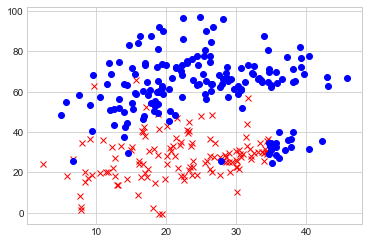

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore") # suppresses matplotlib plotting warnings in visual studio code

plt.style.use('seaborn-whitegrid')
no = df.loc[df['success'] == 0.0]
yes = df.loc[df['success'] == 1.0]
x = no['age']
y = no['interest']
plt.plot(x, y, 'x', color='red')
x = yes['age']
y = yes['interest']
plt.plot(x, y, 'o', color='blue')

Training the perceptron model with a training size of 30% of the data for a total of 5 itterations.

In [8]:
percentage = 0.3
itteration = 5
training_size = int(percentage * len(input))
training_data, training_label = input[:training_size], classes[:training_size]

# Training data and getting weights
weight = train_model(training_data,training_label,itteration)

score = 0
for xi,label in zip(input[training_size:],classes[training_size:]):
  if predict(xi,weight) == label:
    score +=1
print("Weigths:\t",weight)
print("Success rate:\t%.3f%%" %(score/len(input[training_size:])*100))

Weigths:	 [-182.66510763  155.92939922]
Success rate:	73.077%


**Since the data is not linearly separable the perceptron is not finding good weights thus why the success rates is affected.**